- Shay Korhorn
- Spring 2024
- DS-160
- Pandas Group Assignment

### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 
Work in a group whom you did not worked before and submit the work before Next class
- Rename the notebook Practice_ClassNB_Pandas_XX (your initial)
- Indivijual submission 

#### Import pandas, numpy

In [1]:
import pandas as pd
import numpy as np

### 1. Load the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [2]:
complaints=pd.read_csv('311-service-requests.csv', dtype='unicode')

### 2. What's even in it? (the summary)


The data represents various complaints/service requests to various NYC departments. 

In [3]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/13 2:08,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827533,-73.79160396,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/13 2:01,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.72104054,-73.90945307,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/13 2:00,10/31/13 2:40,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975,-73.93914372,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/13 1:56,10/31/13 2:21,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77800874,-73.98021349,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/13 1:53,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769093,-73.94738703,"(40.80769092704951, -73.94738703491433)"


In [4]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

In [5]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [6]:
complaints.sample(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
107003,26441533,10/5/13 5:50,10/5/13 7:13,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11420,129-50 150 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.66499972,-73.81145976,"(40.66499971989459, -73.8114597580813)"
99767,26449864,10/7/13 14:50,10/4/13 22:40,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22547,26558716,10/25/13 23:22,10/26/13 0:35,DOT,Department of Transportation,Traffic Signal Condition,Ped Multiple Lamps,NaN,11219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.62864296,-74.00592627,"(40.628642957998856, -74.00592627047388)"
64418,26506143,10/17/13 0:00,NaN,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10460,1890 CROTONA PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84082709,-73.88562136,"(40.84082709430754, -73.88562136152653)"
67229,26495141,10/16/13 10:10,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11234,2082 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.61348186,-73.91804874,"(40.61348186159486, -73.91804873724573)"


In [7]:
complaints.describe()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
count,111069,111069,60270,111069,111069,111069,110613,79022,98807,84441,...,185,185,180,219,49,24,70,98143,98143,98143
unique,111069,26611,19819,26,135,165,788,90,247,41189,...,37,38,2,160,17,2,39,50417,50422,50653
top,26589651,10/24/13 0:00,10/28/13 0:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11226,130 AUDUBON AVENUE,...,BQE/Gowanus Expwy,East/Long Island Bound,Roadway,Roadway,Flushing #1 Field,Staten Island Bound,Unknown,40.84270816,-73.93675169,"(40.842708163812766, -73.93675169432969)"
freq,1,3660,1360,39067,39067,14200,14126,39067,1996,120,...,24,22,127,11,12,13,14,120,120,120


### spaces in column names are replaced with ‘_’
complaints.columns =[column.replace(" ", "_") 
                     for column in complaints.columns]

In [8]:
complaints.columns =[column.replace(" ", "_") 
                     for column in complaints.columns]

In [9]:
complaints.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,26589651,10/31/13 2:08,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827533,-73.79160396,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/13 2:01,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.72104054,-73.90945307,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/13 2:00,10/31/13 2:40,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975,-73.93914372,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/13 1:56,10/31/13 2:21,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77800874,-73.98021349,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/13 1:53,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769093,-73.94738703,"(40.80769092704951, -73.94738703491433)"


### 3. Which month and year the complains received?


All recieved in october of 2013. 

In [10]:
# year
complaints['Created_Date']=pd.to_datetime(complaints['Created_Date'])
complaints['Year']=complaints['Created_Date'].dt.year

In [11]:
complaints.head(1)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Year
0,26589651,2013-10-31 02:08:00,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.70827533,-73.79160396,"(40.70827532593202, -73.79160395779721)",2013


In [12]:
complaints['Year'].value_counts()

2013    111069
Name: Year, dtype: int64

In [13]:
# month
complaints['Month']=complaints['Created_Date'].dt.month
complaints.head(1)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Year,Month
0,26589651,2013-10-31 02:08:00,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,40.70827533,-73.79160396,"(40.70827532593202, -73.79160395779721)",2013,10


In [14]:
complaints['Month'].value_counts()

10    111069
Name: Month, dtype: int64

### 4. Drop the columns which you are not going to use for any analysis/ not bringing any meaningful informations/ most of the entries are null (Find out 5 and explain why you selected that)

    removing - Agency,  Bridge_Highway_Name, Bridge_Highway_Direction, Road_Ramp, Bridge_Highway_Direction, Garage_Lot_Name, Ferry_Direction, Ferry_Terminal_Name, Latitude, Longitude, Location, 

In [15]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   object        
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

In [16]:
complaints.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

In [17]:
complaints.drop(['School_or_Citywide_Complaint','Garage_Lot_Name','Ferry_Direction', 'Ferry_Terminal_Name', 'Latitude',
       'Longitude', 'Location'], 
        axis=1, 
        inplace=True)

### 5. Is there any missing value in the dataset? Display the list.
Impute the missing values in Street_Name, Address_Type, and City 

Yes there are missing valyes in Street_Name, Address_Type, and City. Street_Name is missing 26,637 entries, Address_Type is missing 8,822 entries, and City is missing 12,215 entries. 

Since they are all categorical variables, we will be using constant to fill in the blank entries with unknown. 

In [18]:
complaints.isnull().sum()

Unique_Key                             0
Created_Date                           0
Closed_Date                        50799
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                           456
Location_Type                      32047
Incident_Zip                       12262
Incident_Address                   26628
Street_Name                        26637
Cross_Street_1                     26341
Cross_Street_2                     27064
Intersection_Street_1              91705
Intersection_Street_2              91703
Address_Type                        8822
City                               12215
Landmark                          110974
Facility_Type                      91965
Status                                 0
Due_Date                           71830
Resolution_Action_Updated_Date     14562
Community_Board                        0
Borough                                0
X_Coordinate_(St

In [19]:
complaints['Street_Name'].fillna('Unknown', 
                       inplace=True)

In [20]:
complaints['Street_Name'].isnull().sum()

0

In [21]:
complaints['Address_Type'].fillna('Unknown', 
                       inplace=True)

In [22]:
complaints['Address_Type'].isnull().sum()

0

In [23]:
complaints['City'].fillna('Unknown', 
                       inplace=True)

In [24]:
complaints['City'].isnull().sum()

0

### 6. What are the top 5 `complains` received? Show the result graphically using bar plot.

The top 5 complaint types recieved were heating, general construction, street light condition, DOF literature request, and plumbing. 

<Axes: >

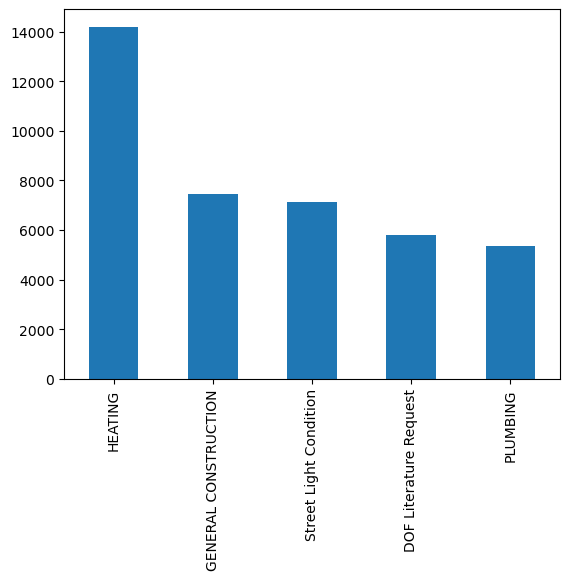

In [25]:
complaints['Complaint_Type'].value_counts().head().plot(kind="bar")

In [26]:
complaints['Complaint_Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint_Type, Length: 165, dtype: int64

### 7. What's the most common `Borough` the complain came? Display top 5 most and plot them out

The most commom Borought that complaints came from was Brooklyn. 

The top 5 were Brooklyn, Manhattan, Queens, Bronx, and Unspecified. 

In [27]:
complaints['Borough'].value_counts()

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Borough, dtype: int64

<Axes: >

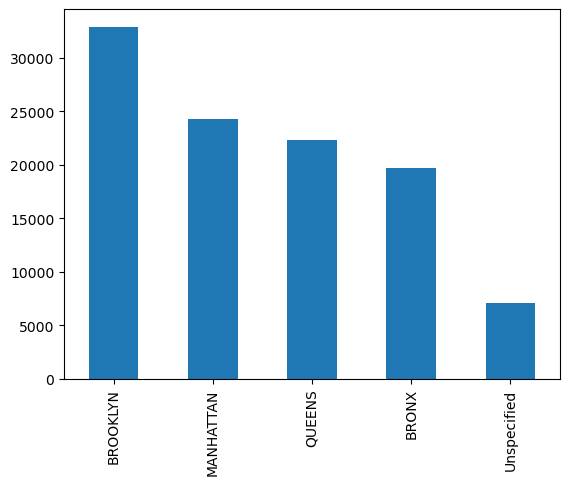

In [28]:
complaints['Borough'].value_counts().head().plot(kind="bar")

### 8. Which agency received the most complain and which one least?

The agency that recieved the most complaints was the HPD (New York City Department of Housing Preservation and Development) with 39067 complaints in October 2013. 

The agencies that recieved the least complaints was the OMB (Office of Management and Budget) and COIB (Conflicts of Interest Board) with 1 complaints in October 2013. 

In [29]:
complaints['Agency'].value_counts()

HPD       39067
DOT       17707
NYPD      15295
DEP        8897
DSNY       8385
DOF        6370
DPR        4614
DOHMH      3237
DOB        3014
TLC        1491
DCA        1405
FDNY        631
HRA         392
DHS         101
EDC          99
DOE          97
3/1/01       92
CHALL        77
DOITT        31
OEM          29
DFTA         22
OPS           8
OATH          4
DOP           2
COIB          1
OMB           1
Name: Agency, dtype: int64

## 9. Investigate the data set and look for meaningful information for two more questions (Individual/ discuss with partner)

### 9. What were the top 5 complaints in Brooklyn, the borough with the most complaints, and display on bar graph. 
The top 5 complaints where heating, genreal construction, plumbing, street light condition, and paint - plaster.

In [30]:
complaints_brooklyn=complaints.loc[(complaints.Borough=='BROOKLYN')]
complaints_brooklyn['Complaint_Type'].value_counts().head()

HEATING                   4548
GENERAL CONSTRUCTION      2791
PLUMBING                  2017
Street Light Condition    1956
PAINT - PLASTER           1821
Name: Complaint_Type, dtype: int64

<Axes: >

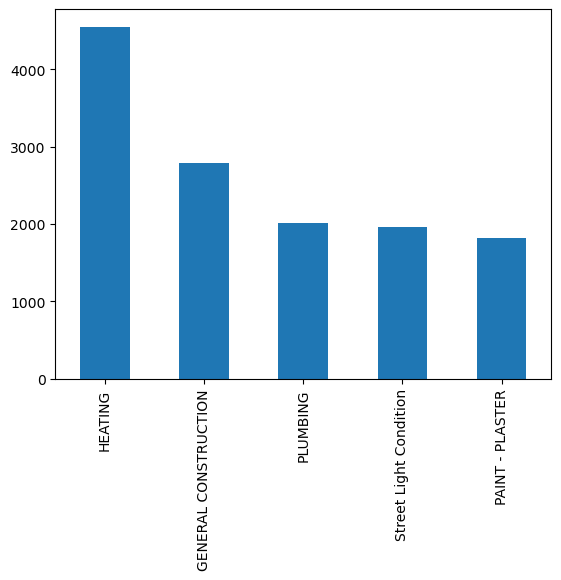

In [31]:
complaints_brooklyn['Complaint_Type'].value_counts().head().plot(kind='bar')

### What borough had the least complaints, what were the top 5 and display on bar graph?

Borough with least complaints was staten island. The top 5 complaints were street light condition, street condition, water system, illegal parking, general construction.

In [32]:
complaints['Borough'].value_counts()

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Borough, dtype: int64

In [33]:
complaints_staten=complaints.loc[(complaints.Borough=='STATEN ISLAND')]
complaints_staten['Complaint_Type'].value_counts().head()

Street Light Condition    449
Street Condition          445
Water System              326
Illegal Parking           278
GENERAL CONSTRUCTION      224
Name: Complaint_Type, dtype: int64

<Axes: >

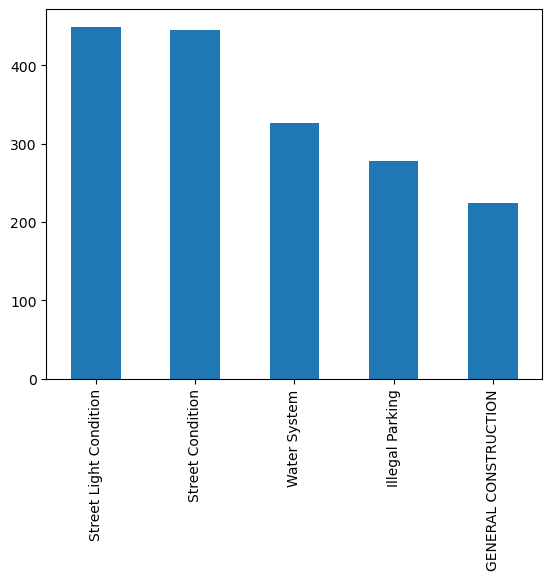

In [34]:
complaints_staten['Complaint_Type'].value_counts().head().plot(kind='bar')

### 10. Select illegal Parking complains at Queens Borough and save it to new_complaint. How many entries are there?
You can use `query`/iloc

There are 887 entries for complaints concerning illegal parking in Queens

In [35]:
new_complaints=complaints.query('Complaint_Type=="Illegal Parking" & Borough=="QUEENS"')

In [36]:
print(f"There are {len(new_complaints)} entries for complaints concerning illegal parking in Queens")

There are 887 entries for complaints concerning illegal parking in Queens


In [37]:
new_complaints.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Not_Found,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Year,Month
1,26593698,2013-10-31 02:01:00,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
116,26591037,2013-10-30 23:20:00,10/31/13 2:16,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
117,26592954,2013-10-30 23:20:00,10/31/13 1:18,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
140,26592551,2013-10-30 23:01:00,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
186,26591575,2013-10-30 22:33:00,10/30/13 23:06,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10


### 11. Filter 3 columns `Complaint_Type, Created_Date,Descriptor` from the new_complaint and save it as a CSV file named **Complains at Queens**.

In [38]:
complaints_at_queens=new_complaints.iloc[:,[0,4,5,6]]

In [39]:
complaints_at_queens.head()

,Unique_Key,Agency_Name,Complaint_Type,Descriptor
1,26593698,New York City Police Department,Illegal Parking,Commercial Overnight Parking
116,26591037,New York City Police Department,Illegal Parking,Blocked Hydrant
117,26592954,New York City Police Department,Illegal Parking,Posted Parking Sign Violation
140,26592551,New York City Police Department,Illegal Parking,Commercial Overnight Parking
186,26591575,New York City Police Department,Illegal Parking,Commercial Overnight Parking


In [40]:
complaints_at_queens.to_csv("Complaints_at_Queens.csv", index=False)

### 12. Load it back to verify the data

In [41]:
complaints_at_queens1= pd.read_csv("Complaints_at_Queens.csv",
          index_col=[0])

In [42]:
complaints_at_queens1.head()

,Agency_Name,Complaint_Type,Descriptor
Unique_Key,,,
26593698,New York City Police Department,Illegal Parking,Commercial Overnight Parking
26591037,New York City Police Department,Illegal Parking,Blocked Hydrant
26592954,New York City Police Department,Illegal Parking,Posted Parking Sign Violation
26592551,New York City Police Department,Illegal Parking,Commercial Overnight Parking
26591575,New York City Police Department,Illegal Parking,Commercial Overnight Parking
